# Quantile-Quantile Plots

Quantile-quantile plots (QQ plots for short) are a graphical tool to assess a sample's goodness-of-fit to a continuous distribution.
MLTools provides the `qq_plot` function in its `visualization` module to draw QQ plots.

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", palette="muted", color_codes=True)

from mltools.visualization import qq_plot

In [2]:
# Set the NumPy random number generator seed for replicability
np.random.seed(100)

## Default: Comparing with a Normal Distribution

If the theoretical quantile function is not specified, then the normal distribution is used for comparison.
The sample mean and (non-Bessel corrected) sample standard deviation are used as the location and scale parameters.

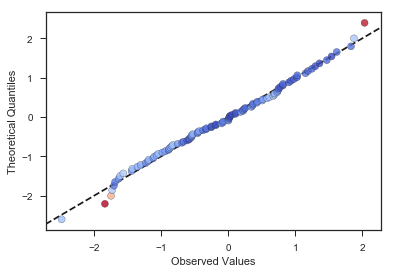

In [3]:
# Normal random sample
data = np.random.normal(size=100)

plt.figure()
qq_plot(data)
plt.show()
plt.show()

## Explicit Quantile Function

Alternatively, you may specify an explicit quantile function (parameter `quantile`).

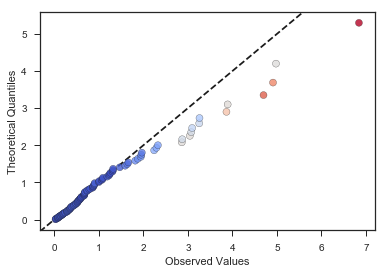

In [4]:
# Exponential random sample
data = st.expon.rvs(size=100)

plt.figure()
qq_plot(data, quantile=st.expon.ppf)
plt.show()
plt.close()

## Fitting a `scipy.stats.rv_continuous` Distribution

You may pass a `scipy.stats.rv_continuous` instance as the `quantile` parameter (e.g., we use the exponential distirubiton `scipy.stats.expon` here).
This will fit the appropriate distribution to the data.

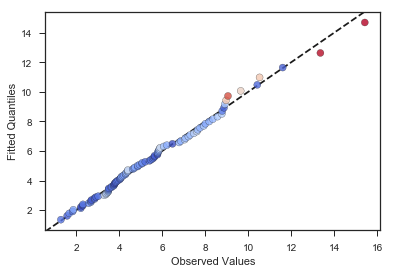

In [5]:
# Gamma random sample
data = st.gamma.rvs(a=5, size=100)

plt.figure()
qq_plot(data, quantile=st.gamma)
plt.show()
plt.close()

Alternatively, you may pass the *name* of a `scipy.stats.rv_continuous` object as the `quantile` parameter, and again this will fit the appropriate distribution to the data.

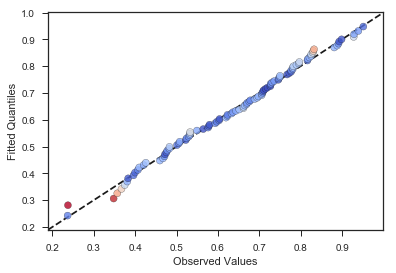

In [6]:
# Beta random sample
data = st.beta.rvs(a=5, b=3, size=100)

plt.figure()
qq_plot(data, quantile="beta")
plt.show()
plt.close()

## Configuring QQ Plots

The properties of the scatter plot itself can be configured by passing `matplotlib.axes.Axes.scatter` keyword arguemnts as additional keyword arguments to `qq_plot`.

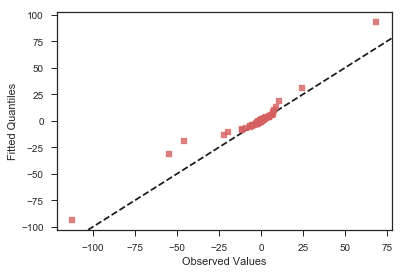

In [7]:
# Cauchy random sample
data = st.cauchy.rvs(size=100)

plt.figure()
qq_plot(data, quantile="cauchy", s=30, marker="s", c="r", edgecolor=None)
plt.show()
plt.close()

The diagonal line can be omitted by setting `diag=False`.

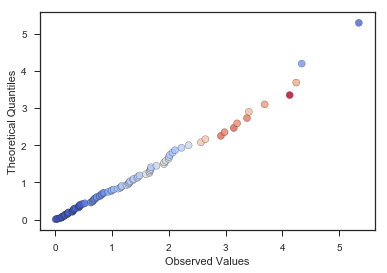

In [8]:
# Exponential random sample
data = st.expon.rvs(size=100)

plt.figure()
qq_plot(data, quantile=st.expon.ppf, diag=False)
plt.show()
plt.close()

The diagonal line can be customized by passing a dictionary of `matplotlib.axes.Axes.plot` keyword arguments as the `diag_kwargs` parameter to `qq_plot`.

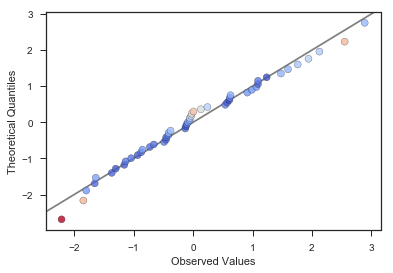

In [9]:
# Normal random sample
data = np.random.normal(size=50)

plt.figure()
qq_plot(data, diag_kwargs={"c": "gray", "ls": "-"})
plt.show()
plt.close()

The plot can be a square with identitcal x and y axes, so that the diagonal line goes from the bottom left to the top right, by passing `square=True` to `qq_plot`.

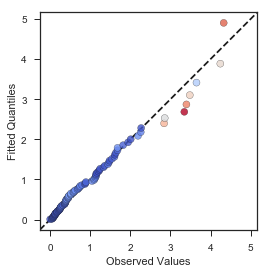

In [10]:
# Exponential random sample
data = st.expon.rvs(size=100)

plt.figure()
qq_plot(data, quantile="expon", square=True)
plt.show()
plt.close()

It is possible to draw a rug plot of the data sample over the QQ plot by setting `rug=True`.

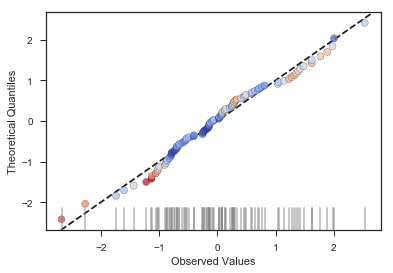

In [11]:
# Normal random sample
data = st.norm.rvs(size=100)

plt.figure()
qq_plot(data, rug=True)
plt.show()
plt.close()

The rug plot can be customized by passing a dictionary of `matplotlib.axes.Axes.axvline` keyword arguments as `rug_kwargs` when `rug=True`.

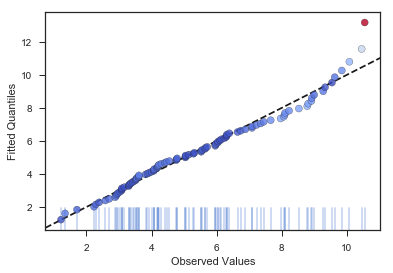

In [12]:
# Gamma random sample
data= st.gamma(a=5).rvs(size=100)

plt.figure()
qq_plot(data, quantile="gamma", rug=True, rug_kwargs={"c": "b", "alpha": 0.3})
plt.show()
plt.close()

It is possible to specify the `matplotlib.axes.Axes` object on which to draw a QQ plot by passing it as the `ax` parameter to `qq_plot`.

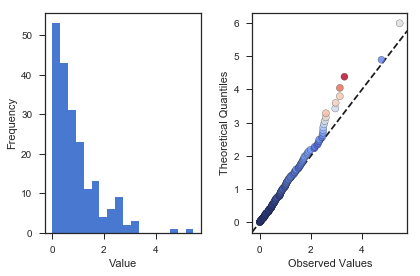

In [13]:
# Exponential random sample
data = st.expon.rvs(size=200)

_, ax = plt.subplots(nrows=1, ncols=2)

ax[0].hist(data, bins="auto")
ax[0].set(xlabel="Value", ylabel="Frequency")

qq_plot(data, quantile=st.expon.ppf, ax=ax[1])

plt.tight_layout()
plt.show()
plt.close()